<a href="https://colab.research.google.com/github/Ultan-Kearns/LYIT-Machine-Learning-Project/blob/main/CA3Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading files and importing libraries

In [84]:
#import libraries
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib 
import matplotlib.pyplot as plt
from scipy import stats

from google.colab import files
import io

uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded['BreastCancerDataset.csv']), header = 0)

Saving BreastCancerDataset.csv to BreastCancerDataset (1).csv


# In this section we prep the data and remove columns

In [155]:
# Show dataset
# split data into training and test datasets
trainingSet = df[0:285]
testSet = df[284:570]

# Drop ID from the dataframe, it is not useful for our purposes except for identifying unique files
trainingSet = trainingSet.drop(['ID'],axis=1)
testSet = testSet.drop(['ID'],axis=1)


In [86]:
trainingSet.head()


,Diagnosis,Mean_Radius,Mean_Texture,Mean_Perimeter,Mean_Area,Mean_Smoothness,Mean_Compactness,Mean_Concavity,Mean_Concave_Points,Mean_Symmetry,Mean_Fractal_Dimension,Radius_SE,Texture_SE,Perimeter_SE,Area_SE,Smoothness_SE,Compactness_SE,Concavity_SE,Concave_Points_SE,Symmetry_SE,Fractal_Dimension_SE,Worst_Radius,Worst_Texture,Worst_Perimeter,Worst_Area,Worst_Smoothness,Worst_Compactness,Worst_Concavity,Worst_Concave_Points,Worst_Symmetry,Worst_Fractal_Dimension
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [87]:
testSet.head()


,Diagnosis,Mean_Radius,Mean_Texture,Mean_Perimeter,Mean_Area,Mean_Smoothness,Mean_Compactness,Mean_Concavity,Mean_Concave_Points,Mean_Symmetry,Mean_Fractal_Dimension,Radius_SE,Texture_SE,Perimeter_SE,Area_SE,Smoothness_SE,Compactness_SE,Concavity_SE,Concave_Points_SE,Symmetry_SE,Fractal_Dimension_SE,Worst_Radius,Worst_Texture,Worst_Perimeter,Worst_Area,Worst_Smoothness,Worst_Compactness,Worst_Concavity,Worst_Concave_Points,Worst_Symmetry,Worst_Fractal_Dimension
284,B,12.89,15.70,84.08,516.6,0.07818,0.09580,0.11150,0.033900,0.1432,0.05935,0.2913,1.389,2.347,23.29,0.006418,0.039610,0.07927,0.017740,0.01878,0.003696,13.90,19.69,92.12,595.6,0.09926,0.23170,0.334400,0.101700,0.1999,0.07127
285,B,12.58,18.40,79.83,489.0,0.08393,0.04216,0.00186,0.002924,0.1697,0.05855,0.2719,1.350,1.721,22.45,0.006383,0.008008,0.00186,0.002924,0.02571,0.002015,13.50,23.08,85.56,564.1,0.10380,0.06624,0.005579,0.008772,0.2505,0.06431
286,B,11.94,20.76,77.87,441.0,0.08605,0.10110,0.06574,0.037910,0.1588,0.06766,0.2742,1.390,3.198,21.91,0.006719,0.051560,0.04387,0.016330,0.01872,0.008015,13.24,27.29,92.20,546.1,0.11160,0.28130,0.236500,0.115500,0.2465,0.09981
287,B,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.011710,0.1337,0.05581,0.1532,0.469,1.115,12.68,0.004731,0.013450,0.01652,0.005905,0.01619,0.002081,13.62,15.54,87.40,577.0,0.09616,0.11470,0.118600,0.053660,0.2309,0.06915
288,B,11.26,19.96,73.72,394.1,0.08020,0.11810,0.09274,0.055880,0.2595,0.06233,0.4866,1.905,2.877,34.68,0.015740,0.082620,0.08099,0.034870,0.03418,0.006517,11.86,22.33,78.27,437.6,0.10280,0.18430,0.154600,0.093140,0.2955,0.07009


In [88]:
testSet.values

array([['B', 12.89, 15.7, ..., 0.1017, 0.1999, 0.07127],
       ['B', 12.58, 18.4, ..., 0.008772, 0.2505, 0.06431],
       ['B', 11.94, 20.76, ..., 0.1155, 0.2465, 0.09981],
       ...,
       ['M', 16.6, 28.08, ..., 0.1418, 0.2218, 0.0782],
       ['M', 20.6, 29.33, ..., 0.265, 0.4087, 0.124],
       ['B', 7.76, 24.54, ..., 0.0, 0.2871, 0.07039]], dtype=object)

In [89]:
trainingSet.values

array([['M', 17.99, 10.38, ..., 0.2654, 0.4601, 0.1189],
       ['M', 20.57, 17.77, ..., 0.18600000000000003, 0.275, 0.08902],
       ['M', 19.69, 21.25, ..., 0.243, 0.3613, 0.08757999999999999],
       ...,
       ['M', 19.4, 18.18, ..., 0.2252, 0.359, 0.07787000000000001],
       ['M', 16.24, 18.77, ..., 0.1732, 0.27699999999999997, 0.1063],
       ['B', 12.89, 15.7, ..., 0.1017, 0.1999, 0.07127]], dtype=object)

In [97]:
# print test set shape will be same as training set
testSet.shape

(285, 31)

In [157]:
# Replace malignant with 1 and benign with 0
trainingSet['Diagnosis'] = trainingSet['Diagnosis'].replace({'M':1,'B':0})
testSet['Diagnosis'] = testSet['Diagnosis'].replace({'M':1,'B':0})

## Show standard deviation of diagnose between sets

In [99]:
print('Standard deviation of diagnosis values in training set ',trainingSet['Diagnosis'].std())
print('Variance of diagnosis values in training set: ', trainingSet['Diagnosis'].var())

Standard deviation of diagnosis values in training set  0.5008024201199747
Variance of diagnosis values in training set:  0.25080306399802366


In [100]:
print('Standard deviation of diagnosis values in testing set ',testSet['Diagnosis'].std())
print('Variance of diagnosis values in testing set: ', testSet['Diagnosis'].var())

Standard deviation of diagnosis values in testing set  0.42479955010709197
Variance of diagnosis values in testing set:  0.18045465777118774


In [101]:
# Show correlation of our training set
trainingSet.corr(method='pearson')

,Diagnosis,Mean_Radius,Mean_Texture,Mean_Perimeter,Mean_Area,Mean_Smoothness,Mean_Compactness,Mean_Concavity,Mean_Concave_Points,Mean_Symmetry,Mean_Fractal_Dimension,Radius_SE,Texture_SE,Perimeter_SE,Area_SE,Smoothness_SE,Compactness_SE,Concavity_SE,Concave_Points_SE,Symmetry_SE,Fractal_Dimension_SE,Worst_Radius,Worst_Texture,Worst_Perimeter,Worst_Area,Worst_Smoothness,Worst_Compactness,Worst_Concavity,Worst_Concave_Points,Worst_Symmetry,Worst_Fractal_Dimension
Diagnosis,1.000000,0.703449,0.486942,0.716005,0.667300,0.318325,0.574792,0.621349,0.732803,0.302973,-0.008718,0.503796,-0.045864,0.496016,0.504368,-0.096346,0.276400,0.158485,0.339639,-0.033545,0.048153,0.757922,0.512686,0.765805,0.706237,0.414696,0.585880,0.612934,0.782665,0.421020,0.339240
Mean_Radius,0.703449,1.000000,0.417110,0.997409,0.987874,0.095479,0.481166,0.626009,0.796613,0.139182,-0.320128,0.677708,-0.047038,0.673946,0.748113,-0.166819,0.209612,0.131976,0.326857,-0.063399,-0.045565,0.960571,0.359048,0.956918,0.936653,0.062589,0.374827,0.465053,0.705876,0.127339,-0.012924
Mean_Texture,0.486942,0.417110,1.000000,0.422011,0.401086,-0.004543,0.290733,0.319214,0.342773,0.061334,-0.072598,0.254753,0.268767,0.260600,0.260669,-0.090136,0.190741,0.097355,0.142918,-0.073272,0.029390,0.453687,0.910238,0.454334,0.438724,0.126935,0.343455,0.333414,0.365864,0.138717,0.171297
Mean_Perimeter,0.716005,0.997409,0.422011,1.000000,0.986143,0.138138,0.537948,0.670356,0.829973,0.178659,-0.264251,0.692206,-0.031593,0.695527,0.758395,-0.145430,0.257822,0.164747,0.359235,-0.035609,-0.007039,0.960056,0.364686,0.962578,0.935911,0.096601,0.420113,0.504067,0.735540,0.155737,0.032115
Mean_Area,0.667300,0.987874,0.401086,0.986143,1.000000,0.102347,0.466787,0.631569,0.790651,0.129189,-0.294978,0.719253,-0.016938,0.714389,0.800368,-0.112895,0.213523,0.150140,0.318383,-0.030300,-0.020998,0.946245,0.336771,0.942686,0.943718,0.062505,0.343586,0.447093,0.674255,0.096912,-0.022034
Mean_Smoothness,0.318325,0.095479,-0.004543,0.138138,0.102347,1.000000,0.640152,0.527947,0.549464,0.574677,0.602301,0.285527,0.091694,0.277074,0.232565,0.344254,0.362040,0.226319,0.323970,0.247537,0.307846,0.143708,0.044997,0.175042,0.135849,0.769081,0.476184,0.425674,0.473136,0.408030,0.504941
Mean_Compactness,0.574792,0.481166,0.290733,0.537948,0.466787,0.640152,1.000000,0.881751,0.837869,0.621605,0.579727,0.499361,0.108377,0.547195,0.461337,0.134573,0.750285,0.499371,0.594317,0.295790,0.496107,0.515847,0.293495,0.574490,0.485591,0.530631,0.859221,0.796469,0.806787,0.536170,0.671468
Mean_Concavity,0.621349,0.626009,0.319214,0.670356,0.631569,0.527947,0.881751,1.000000,0.905394,0.523149,0.400231,0.623405,0.141902,0.637248,0.607512,0.152017,0.697010,0.673898,0.662218,0.253360,0.493662,0.633450,0.300559,0.676377,0.617754,0.431627,0.723446,0.863087,0.828574,0.414380,0.513112
Mean_Concave_Points,0.732803,0.796613,0.342773,0.829973,0.790651,0.549464,0.837869,0.905394,1.000000,0.489340,0.198202,0.692318,0.059589,0.701788,0.694843,0.064230,0.506820,0.375297,0.568949,0.147535,0.264834,0.801840,0.316525,0.832186,0.777648,0.432051,0.653525,0.716531,0.894075,0.375089,0.364433
Mean_Symmetry,0.302973,0.139182,0.061334,0.178659,0.129189,0.574677,0.621605,0.523149,0.489340,1.000000,0.497764,0.304270,0.147937,0.308344,0.223600,0.091427,0.428477,0.316322,0.364011,0.490980,0.341827,0.178867,0.093464,0.217316,0.157677,0.401858,0.487624,0.447862,0.454155,0.707725,0.442162


# Training the linear regression model

## We also make predictions for trainingset and testset


r^2 value:  1.0
mean_squared_error value:  4.681152144242102e-30
Prediction:  [1. 1. 1. 1. 1.]


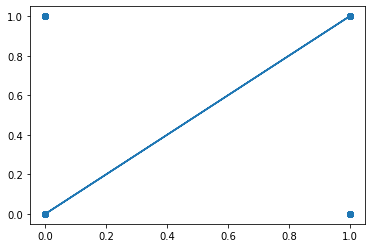

In [102]:
# Here we train a model to perform linear regression data set to predict the diagnosis

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

y = trainingSet.Diagnosis

# create the linear regression model by fitting training set to the test set
regression_model = LinearRegression().fit(trainingSet, y)
# Score the model and retrive r^2 value
rSquared = regression_model.score(trainingSet, y)
prediction = regression_model.predict(trainingSet)
print('r^2 value: ', rSquared)
print('mean_squared_error value: ', mean_squared_error(trainingSet.Diagnosis, prediction))
print('Prediction: ', regression_model.predict(trainingSet.head()))
#Show a scatter plot of training set and 
plt.scatter(trainingSet.Diagnosis,testSet.Diagnosis)
plt.plot(trainingSet.Diagnosis,prediction)

r^2 value:  1.0
mean_squared_error value:  1.8907030665717102e-26
Prediction training set:  [17.99 20.57 19.69 11.42 20.29]


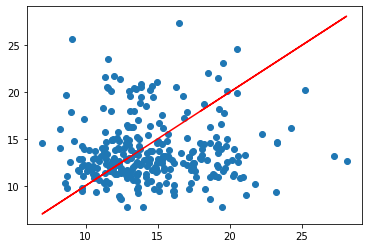

In [103]:
# We can also train the model to predict values in the test set with a high degree of accuracy as shown below
# In this example I have chosen to predict the mean radius of the test set based on the values in the trainingset
y = trainingSet.Mean_Radius

regression_model = LinearRegression().fit(trainingSet, y)
rSquared = regression_model.score(trainingSet, y)
prediction = regression_model.predict(trainingSet)
print('r^2 value: ', rSquared)
print('mean_squared_error value: ', mean_squared_error(trainingSet.Mean_Radius, prediction))
print('Prediction training set: ', regression_model.predict(trainingSet.head()))
plt.scatter(trainingSet.Mean_Radius.values,testSet.Mean_Radius.values)
plt.plot(trainingSet.Mean_Radius,prediction, color='Red')

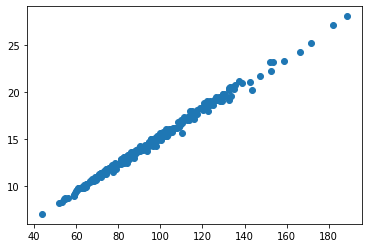

In [104]:
# Example of positive Linear correlation between radius and perimeter
# since these correlate highly we can remove one of them from set

plt.scatter(trainingSet['Mean_Perimeter'],trainingSet['Mean_Radius'])


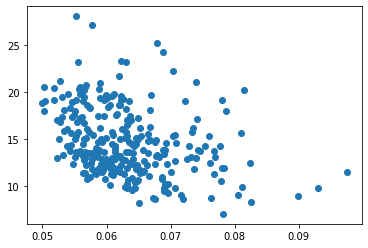

In [105]:
# example of low negative correlation
plt.scatter(trainingSet['Mean_Fractal_Dimension'],trainingSet['Mean_Radius'])


In [106]:

# We drop these as seen above all of these correlate well with the mean_radius in both sets
# removing these seems to reduce the mean squared error

trainingSet = trainingSet.drop(['Mean_Perimeter'],axis=1)
trainingSet = trainingSet.drop(['Mean_Area'],axis=1)
trainingSet = trainingSet.drop(['Worst_Perimeter'],axis=1)
trainingSet = trainingSet.drop(['Worst_Area'],axis=1)
trainingSet = trainingSet.drop(['Mean_Concave_Points'],axis=1)
trainingSet = trainingSet.drop(['Worst_Texture'],axis=1)
trainingSet = trainingSet.drop(['Worst_Fractal_Dimension'],axis=1)

testSet = testSet.drop(['Mean_Perimeter'],axis=1)
testSet = testSet.drop(['Mean_Area'],axis=1)
testSet = testSet.drop(['Worst_Perimeter'],axis=1)
testSet = testSet.drop(['Worst_Area'],axis=1)
testSet = testSet.drop(['Mean_Concave_Points'],axis=1)
testSet = testSet.drop(['Worst_Texture'],axis=1)
testSet = testSet.drop(['Worst_Fractal_Dimension'],axis=1)

# Score the model and retrive r^2 value
# Notice that both our rsquared and mean squared error values decrease after dropping these columns from dataframe
print('r^2 value: ', rSquared)
print('mean squared errors value: ', sqrt(mean_squared_error(trainingSet,testSet)))

r^2 value:  1.0
mean squared errors value:  13.505677226287288


# Random Forest

Here we use random forest algorithm on the data using a random forest regressor

MultiOutputRegressor(estimator=RandomForestRegressor(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     criterion='mse',
                                                     max_depth=24,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                                     n_estimators=100,
                                                

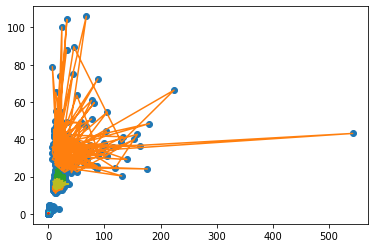

In [107]:
#import packages from sklearn
# referencing sklearn docs: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_classification
from sklearn.multioutput import MultiOutputRegressor

# here we define the multiple output regressor

multi_output_regressor_rf = MultiOutputRegressor((RandomForestRegressor(n_estimators=100,
                                                          max_depth=24,

                                                          random_state=0)))
                                                          
# fit the model and make predictions on the test set
multi_output_regressor_rf.fit(trainingSet,testSet)
print(multi_output_regressor_rf)
testSetPred = multi_output_regressor_rf.predict(testSet)
plt.scatter(testSet,testSetPred)
# As we can see from this plot the model predicts the testSet very well
plt.plot(testSet,testSetPred)

IndexError: ignored

In [27]:
print('R squared value: ',multi_output_regressor_rf.score(trainingSet,testSet))

R squared value:  0.8395450155017796


In [28]:
testSetPred = multi_output_regressor_rf.predict(testSet.head())

print(testSetPred)

[[1.50000000e-01 1.11219900e+01 2.24557000e+01 7.01012000e-02
  7.43455000e-02 3.33625000e-02 1.70823576e-01 6.03782345e-02
  3.48583000e-01 1.26609400e+00 2.33443800e+00 3.20906800e+01
  7.77086907e-03 1.29676535e-02 1.30522220e-02 5.19427481e-03
  2.36542262e-02 3.02853204e-03 1.31041800e+01 1.08425100e-01
  1.55749283e-01 1.21676600e-01 6.04402000e-02 2.90405583e-01]
 [1.30000000e-01 1.36732800e+01 2.26989000e+01 9.15714028e-02
  8.78717278e-02 6.06369271e-02 1.75281990e-01 6.13946612e-02
  2.93035000e-01 1.08721900e+00 2.36463200e+00 3.16744500e+01
  6.14779935e-03 1.79700270e-02 2.54889501e-02 1.03483072e-02
  1.88961012e-02 2.94682084e-03 1.44851100e+01 1.29050183e-01
  2.04066933e-01 2.20414300e-01 1.09896443e-01 2.68488500e-01]
 [1.50000000e-01 1.33501500e+01 1.90309000e+01 9.00261802e-02
  8.19706367e-02 5.07789737e-02 1.75859881e-01 6.17972388e-02
  2.82180167e-01 1.24845483e+00 1.95784000e+00 3.19297200e+01
  6.17564859e-03 1.86038533e-02 2.66532787e-02 9.12060371e-03
  2.06

In [73]:
# K Nearest Neighbour

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(trainingSet[['Diagnosis']],testSet[['Diagnosis']])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


KeyError: ignored

In [120]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
clf = RandomForestClassifier(max_depth=2, random_state=0)
 

AttributeError: ignored

# Naive Bayes prediction of diagnosis

Here we use naive bayes on both sets to perform  the diagnosis based on a few features from the dataset

## References

Sklearn documentation: https://scikit-learn.org/stable/modules/naive_bayes.html

In [175]:
from sklearn.naive_bayes import GaussianNB

naive_bayes = GaussianNB()
naive_bayes.fit(trainingSet[['Diagnosis','Mean_Smoothness','Mean_Compactness','Mean_Concavity',	'Mean_Symmetry'	,'Mean_Fractal_Dimension',	'Radius_SE','Texture_SE',	'Perimeter_SE',	'Area_SE'	,'Smoothness_SE']],trainingSet[['Diagnosis']])
diagnosisPrediction = naive_bayes.predict(trainingSet[['Diagnosis']])
print(diagnosisPrediction)
print("Number of mislabeled points out of a total %d points : %d"
 % (trainingSet.shape[0], (trainingSet['Diagnosis'] != diagnosisPrediction).sum()))


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1
 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1
 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0]
Number of mislabeled points out of a total 285 points : 0


/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [176]:
diagnosisPrediction = naive_bayes.predict(testSet[['Diagnosis']])
print("Number of mislabeled points out of a total %d points : %d"
 % (testSet.shape[0], (testSet['Diagnosis'] != diagnosisPrediction).sum()))


Number of mislabeled points out of a total 285 points : 0
